<table style="width: 100%; border-collapse: collapse;" border="0">
<tr>
<td><b>Created:</b> Tuesday 31 January 2017</td>
<td style="text-align: right;"><a href="https://www.github.com/rhyswhitley/fire_limitation">github.com/rhyswhitley/fire_limitation</td>
</tr>
</table>

<div>
<center>
<font face="Times">
<br>
<h1>Quantifying the uncertainity of a global fire limitation model using Bayesian inference</h1>
<h2>Part 3: Data visualisation</h2>
<br>
<br>
<sup>1,* </sup>Douglas Kelley, 
<sup>2 </sup>Ioannis Bistinas, 
<sup>3, 4 </sup>Chantelle Burton, 
<sup>1 </sup><s>Tobias Marthews,</s>
<sup>5 </sup>Rhys Whitley
<br>
<br>
<br>
<sup>1 </sup>Centre for Ecology and Hydrology, Maclean Building, Crowmarsh Gifford, Wallingford, Oxfordshire, United Kingdom
<br>
<sup>2 </sup>Vrije Universiteit Amsterdam, Faculty of Earth and Life Sciences, Amsterdam, Netherlands
<br>
<sup>3 </sup>Met Office United Kingdom, Exeter, United Kingdom
<br>
<sup>4 </sup>Geography, University of Exeter, Exeter, United Kingdom
<br>
<sup>5 </sup>Natural Perils Pricing, Commercial & Consumer Portfolio & Pricing, Suncorp Group, Sydney, Australia
<br>

### Load libraries

In [1]:
# data munging and analytical libraries 
import re
import os
import numpy as np
import pandas as pd

# graphical libraries
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

# default plot settings for notebook
from IPython.core.pylabtools import figsize
figsize(11, 9)
plt.style.use('ggplot')

%matplotlib inline

dataPath = "../data/globfire.csv"

### Import data

In [24]:
DATAPATH = os.path.expanduser(dataPath)

fd = pd.read_csv(DATAPATH)

### Function definitions

In [25]:
def fuel_load(fuel):
    """
    Definition to describe fuel load: while return the input; capability to be modified later.
    """
    return np.log(fuel)

def moisture(alpha, emc, cM):
    """
    Definition to describe moisture
    """
    return (alpha + 0.01*cM*emc) / (1 + cM)


def ignition(lightning, pasture_area, pop_density, cP, cD1):
    """
    Definition for the measure of ignition
    """
    return lightning + cP*pasture_area + cD1*pop_density

def supression(crop_area, pop_density, cD2):
    """
    Definition for the measure of fire supression
    """
    return crop_area + cD2*pop_density

### Extra model covariates determined

Determine the ignition and supression covariates as per the model documentation

In [26]:
def np_sigmoid(x, k, x0):
    """
    Sigmoid function to describe limitation using tensor
    """
    return 1.0/(1.0 + np.exp(-k*(x - x0)))

## Data viz below

### Dependant Data - GFED burnt area

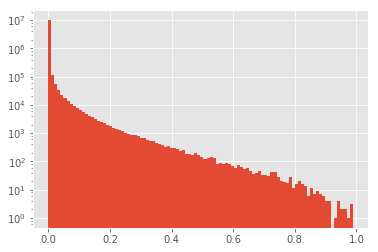

In [27]:
plt.hist(fd.fire, 100)
plt.yscale('log')

### Base Data

In [28]:
def pltVsFire(x, xlab, pnt = 'o', *args, **kw):
    plt.plot(x, fd.fire, pnt, alpha = 0.01, *args, **kw)
    plt.xlabel(xlab)

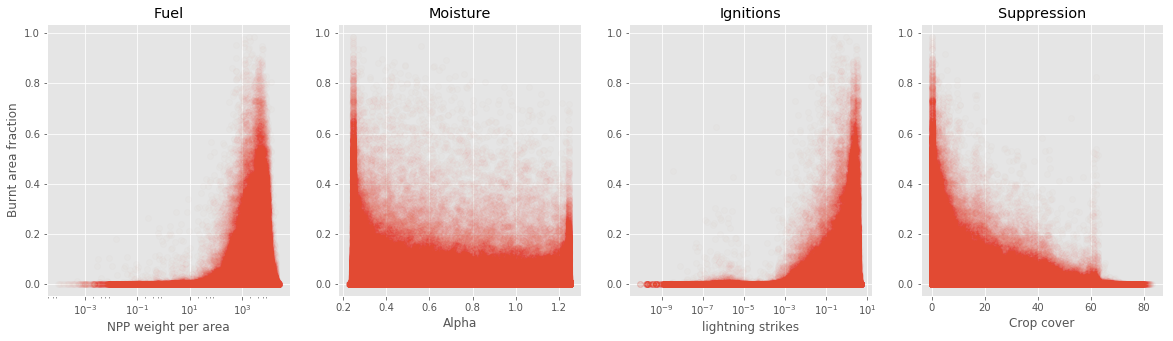

In [29]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 4, 1)
pltVsFire(fd.NPP, "NPP weight per area");
plt.ylabel("Burnt area fraction")
plt.xscale('log')
plt.title('Fuel')

plt.subplot(1, 4, 2)
pltVsFire(fd.alpha, "Alpha")
plt.title('Moisture')

plt.subplot(1, 4, 3)
pltVsFire(fd.lightning_ignitions, "lightning strikes")
plt.xscale('log')
plt.title('Ignitions')

plt.subplot(1, 4, 4)
pltVsFire(fd.cropland, "Crop cover")
plt.title('Suppression')

### Secondary Data

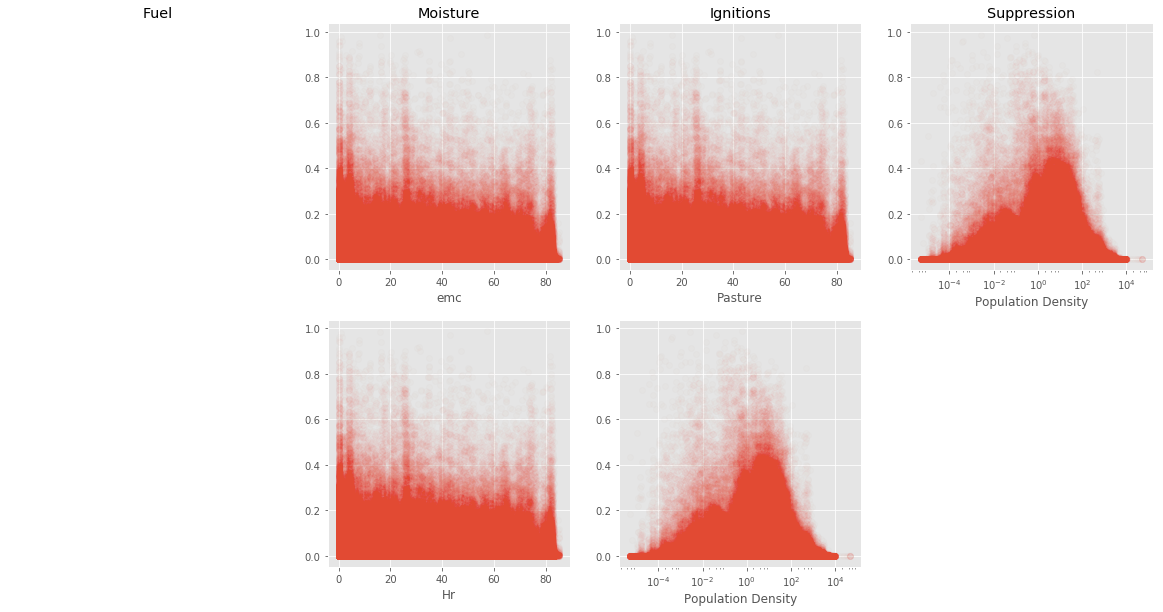

In [30]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 4, 1)
plt.plot(1)
plt.axis('off')
plt.title('Fuel')

plt.subplot(2, 4, 2)
pltVsFire(fd.pasture, "emc")
plt.title('Moisture')

plt.subplot(2, 4, 6)
pltVsFire(fd.pasture, "Hr")

plt.subplot(2, 4, 3)
pltVsFire(fd.pasture, "Pasture")
plt.title('Ignitions')

plt.subplot(2, 4, 7)
pltVsFire(fd.population_density, "Population Density")
plt.xscale('log')

plt.subplot(2, 4, 4)
pltVsFire(fd.population_density, "Population Density")
plt.xscale('log')
plt.title('Suppression')

### Constructed limitations - priors

#### Fuel
Using prior estimates from litriture

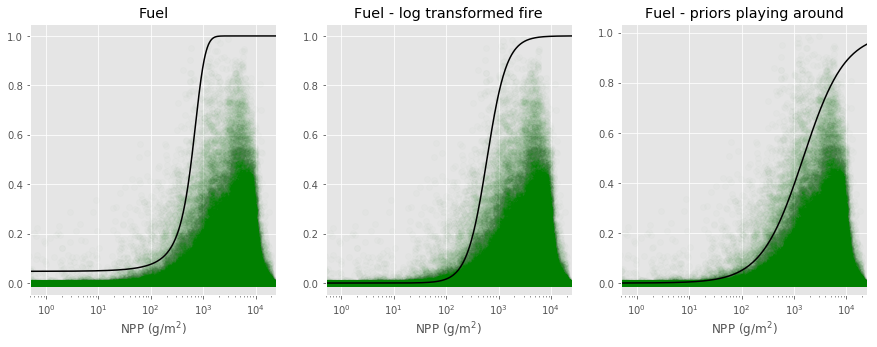

In [33]:
plt.figure(figsize=(15, 5))

## NPP
plt.subplot(1, 3, 1)
pltVsFire(fd.NPP, "NPP (g/m$^2$)", 'go')

NPP = np.arange(-6, np.log10(fd.NPP.max()), 0.01)
NPP = 10**NPP
Fire = np_sigmoid(NPP, 1/200, 600)
plt.plot(NPP, Fire, 'k')

plt.xscale('log')
plt.xlim([0.5, fd.NPP.max()])
plt.title('Fuel')

## NPP log transformed first
plt.subplot(1, 3, 2)
pltVsFire(fd.NPP, "NPP (g/m$^2$)", 'go')

NPP = np.arange(-6, np.log10(fd.NPP.max()), 0.01)
Fire = np_sigmoid(NPP, 5.289052, np.log10(600))
plt.plot(10**NPP, Fire, 'k')

plt.xscale('log')
plt.xlim([0.5, fd.NPP.max()])
plt.title('Fuel - log transformed fire')

## Priors from playing around
plt.subplot(1, 3, 3)
pltVsFire(fd.NPP, "NPP (g/m$^2$)", 'go')

NPP = np.arange(-6, np.log10(fd.NPP.max()), 0.01)
Fire = np_sigmoid(NPP, 2.5, np.log10(1500))
plt.plot(10**NPP, Fire, 'k')

plt.xscale('log')
plt.xlim([0.5, fd.NPP.max()])
plt.title('Fuel - priors playing around')

#### Moisture

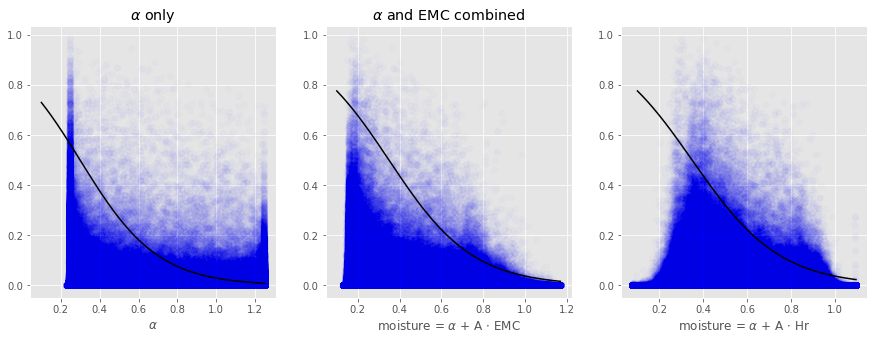

In [40]:
plt.figure(figsize=(15, 5))

## Just alpha
plt.subplot(1, 3, 1)
pltVsFire(fd.alpha, "$\\alpha$",'bo')
Alpha = np.arange(0.1, fd.alpha.max(), 0.003)
Fire = np_sigmoid(Alpha, -5, 0.3)
plt.plot(Alpha, Fire, 'k')
plt.title('$\\alpha$ only')




#Alpha + 1 x EMC
fd['moisture'] = moisture(fd["alpha"].values, \
                 fd["emc"].values, \
                 1.0)

plt.subplot(1, 3, 2)
pltVsFire(fd.moisture, "moisture = $\\alpha$ + A $\cdot$ EMC",'bo')
Alpha = np.arange(0.1, fd.moisture.max(), 0.003)
Fire = np_sigmoid(Alpha, -5, 0.35)
plt.plot(Alpha, Fire, 'k')
plt.title('$\\alpha$ and EMC combined')

##Apha and Hr
plt.subplot(1, 3, 3)
fd['moisture'] = moisture(fd["alpha"].values, \
                 fd["Hr"].values, \
                 2)

pltVsFire(fd.moisture, "moisture = $\\alpha$ + A $\cdot$ Hr",'bo')
Alpha = np.arange(0.1, fd.moisture.max(), 0.003)
Fire = np_sigmoid(Alpha, -5, 0.35)
plt.plot(Alpha, Fire, 'k')

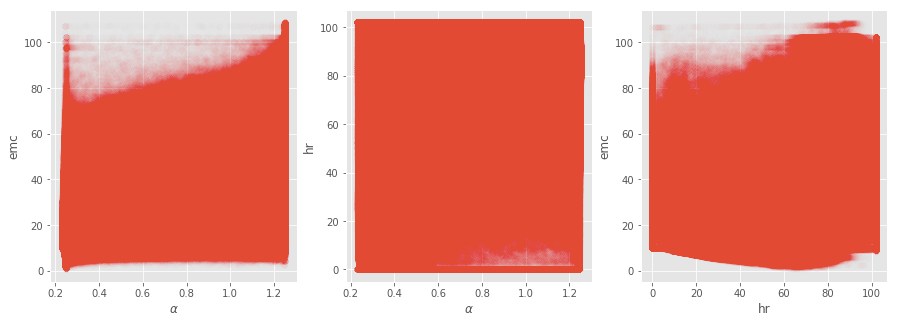

In [42]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(fd.alpha, fd.emc, 'o', alpha = 0.002)
plt.ylabel("emc")
plt.xlabel("$\\alpha$")

plt.subplot(1, 3, 2)
plt.plot(fd.alpha, fd.Hr , 'o', alpha = 0.002)
plt.ylabel("hr")
plt.xlabel("$\\alpha$")

plt.subplot(1, 3, 3)
plt.plot(fd.Hr   , fd.emc, 'o', alpha = 0.002)
plt.ylabel("emc")
plt.xlabel("hr")


#### Igntions

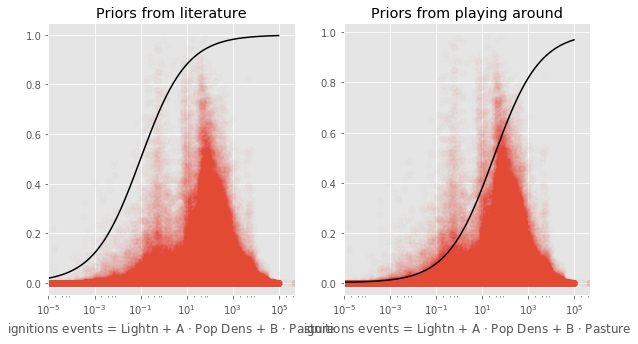

In [43]:
plt.figure(figsize=(15, 5))

## Priors from literature
plt.subplot(1, 3, 1)
fd['ignite'] = ignition(fd["lightning_ignitions"].values, \
               fd["pasture"].values, \
               fd["population_density"].values, \
               1.0, 10.0)

pltVsFire(fd.ignite, "ignitions events = Lightn + A $\cdot$ Pop Dens + B $\cdot$ Pasture")
#Ignite = np.logspace(-10, np.log10(fd.ignite.max()), 100)
#Ignite = 10**(Ignite)
Ignite = np.arange(-15,5, 0.01)
Fire = np_sigmoid(Ignite, 1, -1)
plt.plot(10**Ignite, Fire, 'k')
plt.xlim([10**-5, fd.ignite.max()])
plt.xscale('log')
plt.title('Priors from literature')

## Priors from playing around
plt.subplot(1, 3, 3)

pltVsFire(fd.ignite, "ignitions events = Lightn + A $\cdot$ Pop Dens + B $\cdot$ Pasture")
#Ignite = np.logspace(-10, np.log10(fd.ignite.max()), 100)
#Ignite = 10**(Ignite)
Ignite = np.arange(-15,5, 0.01)
Fire = np_sigmoid(Ignite, 1, 1.5)
plt.plot(10**Ignite, Fire, 'k')
plt.xlim([10**-5, fd.ignite.max()])
plt.xscale('log')
plt.title('Priors from playing around')

#### Suppression

Priors from literature

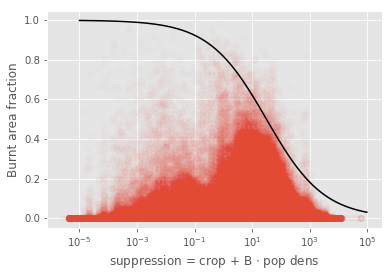

In [121]:
fd['suppress'] = supression(fd["cropland"].values, \
                 fd["population_density"].values, \
                 (64.0/50.0))

pltVsFire(fd.suppress, "suppression = crop + B $\cdot$ pop dens")
Ignite = np.arange(-5,5, 0.01)
Fire = np_sigmoid(Ignite, -1, 1.5)
plt.plot(10**Ignite, Fire, 'k')

plt.xscale('log')

Priors from playing around

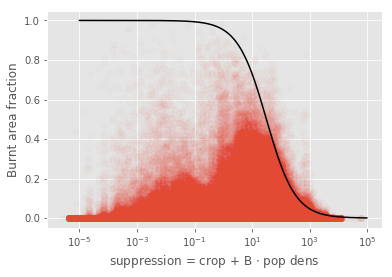

In [122]:
pltVsFire(fd.suppress, "suppression = crop + B $\cdot$ pop dens")
Ignite = np.arange(-5,5, 0.01)
Fire = np_sigmoid(Ignite, -2, 1.5)
plt.plot(10**Ignite, Fire, 'k')

plt.xscale('log')

In [20]:
import csv
with open('outputs/yay.csv', 'w') as csvfile:
    output = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerow(['Spam'] * 5 + ['Baked Beans'])
    spamwriter.writerow(['Spam', 'Lovely Spam', 'Wonderful Spam'])

FileNotFoundError: [Errno 2] No such file or directory: 'outputs/yay.csv'